# AMAT 502: Modern Computing for Mathematicians
## Lecture 11 - Probability and Distributions
### University at Albany SUNY

# Topics for Today

- Determinism versus Randomness
- Deterministic versus Stochastic Programs
- Elementary Rules for Calculating Probabilities
- The Frequentist Approach
- Some Examples of Distributions

# Determinism versus Randomness
## Classical Mechanics
Most of classical physics is deterministic. This means that if you know the initial position and velocity of an object, like a baseball, then you can predict perfectly it's future motion.
![Classical Mechanics](motion.png)


## Quantum Mechanics and Wave Mechanics
By contrast, if we're interested in the behavior of objects at the atomic (and even molecular level!) then scientists have developed a framework where objects have several possible **states**. 

States are defined to be eigenvectors of certain measurement operators: like measuring energy, position, momentum or even "spin". The surprising fact is that for atomic objects the values of these measurements are discrete, i.e. they are *quantized*, just like the levels in the electron shell can only exist at discrete levels.

Quantization is a fundamental feature of **wave mechanics**, as in the figure below.

All of music, notes and the *harmonies* we like to listen to, are features of **standing waves.** In fact this explains the origin of the term **harmonic series**
$$1 + \dfrac{1}{2} + \dfrac{1}{3} + \dfrac{1}{4} + \dfrac{1}{5} + \cdots = \sum_{n=1}^{\infty} \dfrac{1}{n}$$

![Rope Waves](rope-waves.jpg)

## Model of the Atom
Now suppose we're interested in waves around a circle. Notice that the endpoints must match up, so just like with standing waves, there are only so many wavelengths that can exist as an electron (which we know as wave-like behavior) "orbits" the nucleus in the atom.
![Model of the Atom](atom.jpg)
*From [https://www.slideshare.net/mrtangextrahelp/tang-02-schrdingers-atomic-model](https://www.slideshare.net/mrtangextrahelp/tang-02-schrdingers-atomic-model)*

## Schrödinger's Cat

Quantum Mechanics says that all things exist in a **superposition**, which is just a fancy way of saying a *linear combination*, of states.

The Copenhagen interpretation of Quantum Mechanics (QM) says that only upon observing a system (applying the measurement operator) does a system collapse to one of its possible states. In other words, a system (viewed as a linear combination of states) "jumps" to a state (an eigenvector of the measurement operator) with some probability given by the norm of the coefficient of that state.

Consequently, QM says nature is fundamentally *random* at the atomic level. But this has big implications for how we should think of nature at the everyday level as well.

Schrödinger's Cat is the thought experiment where a hammer is hooked up to a device that measures whether a particle decays or not. If it decays, then the hammer breaks a beaker filled with a poison gas, which kills a cat inside the box. Since we don't know whether the particle decays or not until we open the box, the cat is supposed to exist in a superposition of an alive and dead state!

![Schrodinger's Cat](schrodingers-cat.png)

## Deterministic Programs

A program is **deterministic** if whenever it is run on the same input, it produces the same output.

We could code up Newton's laws and simulate the motion of a baseball deterministically.

Also, most of math is deterministic in the sense that we think of functions having a well defined output for any given input. This has bearing on programming as well, as we want to implement mathematical functions in Python.

Consider the program where we found the square root of a number within epsilon of the true square root

```python
def squareRoot(x, e):
    '''Returns value y such that x - e <= y*y <= x + e
``` 

Although there are infinitely many values $y$ such that $x - \epsilon \leq y^2 \leq x + \epsilon$, our implementation of the bisection search algorithm to compute the square root provided the same value of $y$ everytime we ran the squareRoot function.

In [1]:
def squareRoot(x,e):
    left = 0
    right = max(x,1.0)
    numGuesses2 = 0
    guess = (right+left)/2.0
    while abs(guess**2 - x) > e:
        numGuesses2 += 1
        if guess**2 < x:
            left = guess
        else:
            right = guess
        guess = (right+left)/2.0
    return guess

In [2]:
x=2
eps=.01
print(squareRoot(x,eps))
print(squareRoot(x,eps))
print(squareRoot(x,eps))
print(squareRoot(x,eps))

1.4140625
1.4140625
1.4140625
1.4140625


## Stochastic Programs
Now suppse we want to write a function that simulates rolling a fair six-sided die.

```python
def rollDie():
    ''' Returns and integer between 1 and 6'''
```

How would we do it? From experience we know that not everytime we roll a die do we get the same output. Such a process is called **stochastic** because the outcome cannot be predicted precisely.

In [5]:
import numpy as np
def rollDie():
    return np.random.randint(1,7)

l = []
for i in range(12):
    l.append(rollDie())
l

[3, 4, 1, 4, 3, 6, 6, 5, 4, 2, 2, 5]

## Independence
Our output seems to be giving us what we want in terms of randomness. Would it be more or less surprising to instead see the output $$[1,1,1,1,1,1,1,1,1,1,1,1]?$$ 

Your answer should be **NEITHER**. The sequence generated in the code cell above and the sequence shown above are equally likely.

This is because each roll of the die is **independent**, meaning that the value of the first roll has no bearing on the value of the second roll and so on.

## Calculating Probabilities

In general, we need to talk about the **probability of an event**. An **event** is a subset of the space of all possible outcomes.

In discrete probability, where all possible outcomes are equally likely, the probability of an event is equal to the fraction of all possible states with the desired property.

### Probability of an Outcome
For example, what's the probability of rolling a fair six-sided die and getting a value of 3?

Well, there six possible outcomes, so we have a probability of $\dfrac{1}{6}$.

If we want to know the probability of rolling two 3's then there are now $6^2 = 36$ pairs of values between 1 and 6, the first value representing the first roll and the second value representing the second roll. Out of those pairs there is only one pair $(3,3)$, so the probability of that outcome is $\dfrac{1}{36}$

### Probability of an Event
What's the probability of rolling an even number? 

Well, there are three states that are even $\{2,4,6\}$, so the probability of getting an even outcome is $\dfrac{3}{6}$.
 
**Question:** What's the probability of rolling two fair six sided die and at least one of the values being even? 

### Independence and the Multiplication Rule

The probability of rolling two 3's is an instance of the **multiplication rule of independent probabilities**. 

Notice that $$P(\text{Roll a 3 AND Roll a 3 again}) = \frac{1}{36} = \frac{1}{6}*\frac{1}{6} =P(\text{Roll a 3})\times P(\text{Roll a 3})$$.

### The Rule of Complements

If we want to know the probability of an event **not occurring** we can use the rule of complements, i.e. $$P(\text{not A})= 1 - P(\text{A})$$

This along with the multiplication rule allows us to answer more complicated questions like "What is the probability of rolling a fair six-sided die 25 times and never rolling a 1?" 

This is the same thing as
$$P(\text{not rolling a 1})\times P(\text{not rolling a 1}) \times \cdots \times P(\text{not rolling a 1}) = (1-\frac{1}{6})^{25}$$

# Frequentist Statistics

The basic laws of probability discussed above all assume we are given a well-defined space of outcomes and some probabilities for these.

What if we instead we are "in the world" and we want to calculate these probabilities by observation?

For example, how might we check that the die we were rolling truly is fair? Or in our case, how do we check that randint is giving us truly random integers between 1 and 6 in our code above? 

We would want to use **inferential (or frequentist) statistics** to estimate the probability of getting either a 1,2,3,4,5, or 6 by trying out our process `rollDie()` a large number of times and check that each value is close to the probability of rolling a fair die.

## Inferential Statistics

The guiding principle of inferential statistics is that a random sample will tend to exhibit the same properties as the population from which it's drawn.

In [6]:
def rollMean(n):
    for j in range(1,7):    
        c = 0
        for i in range(n):
            r = rollDie()
            if r == j:
                c += 1
        print('Probability of rolling a ', j, 'is', c/n)

In [7]:
rollMean(100)

Probability of rolling a  1 is 0.15
Probability of rolling a  2 is 0.13
Probability of rolling a  3 is 0.18
Probability of rolling a  4 is 0.17
Probability of rolling a  5 is 0.2
Probability of rolling a  6 is 0.12


In [8]:
rollMean(100000)

Probability of rolling a  1 is 0.16768
Probability of rolling a  2 is 0.16706
Probability of rolling a  3 is 0.16598
Probability of rolling a  4 is 0.1669
Probability of rolling a  5 is 0.16585
Probability of rolling a  6 is 0.16773


## The Law of Large Numbers

What we are witnessing is the **law of large numbers** which tells us that as the number of trials $n$ increases, the average value of the sample approaches the true probability of the event occuring.

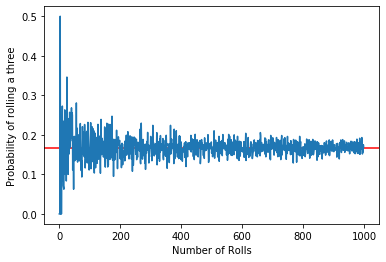

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
#convergence of probability of rolling a 3
def lawLargeNumbers(n):
    avg_three = []
    for i in range(1,n + 1):
        c = 0
        for j in range(1,i):
            r = rollDie()
            if r == 3:
                c += 1
        avg_three.append(c/i)
    x = range(n)
    plt.axhline(y=0.16667, color='r', linestyle='-')
    plt.plot(x,avg_three)
    plt.xlabel('Number of Rolls')
    plt.ylabel('Probability of rolling a three')
    plt.show()
lawLargeNumbers(1000)

# Probability Distributions

The above experiments shows us that in the limit, we have the following probability distribution on each roll:

| X |  1 | 2  | 3  | 4  | 5 | 6  |
|---|---|---|---|---|---|---|
|p(x) | 1/6  | 1/6  | 1/6  | 1/6  | 1/6  | 1/6 |

This is an example of a **uniform distribution**, where the probability of each event is given as the value of the **probability mass function** $p_X(x)$.

A **histogram** plot is a computational way of calculating and visualization probability distributions. 

The values are sorted and divided up into a certain number of bins, and those bins are drawn out with their heights being the number of elements in each bin. Dividing by the total number of observations gives **empirical probabilities**, i.e frequencies that are observed in an experiment.

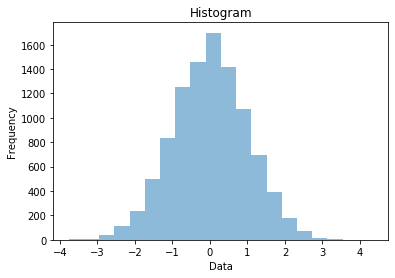

In [13]:
x = np.random.randn(10000)

# the histogram of the data
#alpha parameter just adjusts color saturation, low values are dimmer, high values are darker
plt.hist(x, 20, alpha = .5)
plt.xlabel('Data')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()

## Discrete versus Continuous Distributions

A histogram is a depiction of a frequency distribuition. It tells us how often a random variable has taken on some value. It also provides information about relative frequency as well, i.e., we can see how many times a numbers between -2 and 2 show up relative to the rest of the values showing up. A **probability distribution** captures the notion of relative frequency by giving the probability of a random value taking on a value within a certain range. Probability distributions can either be 

* Discrete: Fintite number of values our random variables can take on

* Continuous: The possible values our random variable can take is infinite, and the probability that a continuous random variable will take on a specific value is usually zero. **However, probabilities can be computed using integration of the probability distribution function.**

## Binomial Distribution

Suppose we go back to our rolling dice example. Then we can see that since our random variable, the die, can only take on values 1,2,3,4,5, or 6 so the underlying ditribution of rolling a given value $k$ times when you roll a die $n$ times will have a discrete distribution. If we want to answer the question
                    What is the probability of rolling exactly two 1s in 3 rolls of a die?
we can calculate it as follows:

Denote rolling a 1 as $Y$ and rolling anything that is not a 1 as $N$. When rolling a die three times, the different ways to get exactly two 1s is $YYN$, $YNY$, $NYY$. 

## Binomial Distribution

So if we calculate the probability of each event we see that they are all equal to $\frac{1}{6}*\frac{1}{6}*\frac{5}{6} = \frac{5}{6^3}$ and so the probability of rolling exactly two 1s when rolling three times is $3*\frac{5}{6^3}$. Notice that each way of the three ways of getting exactly two 1s is an instance of ordering two successes and 1 failure, or how many ways can we succeed two times with three attempts. This number (so in our example the 3) is just

$${3 \choose 2} = \dfrac{3!}{2!1!}$$

Then each probability was just the product of 
$$(\text{probability of success})^{\text{number of success}}*(\text{probability of failure})^{\text{number of failures}}$$

## Binomial Distribution

In general if we are analyzing a random variable where it's values are either success or failure then the probability of exactly $k$ successes in $n$ independent trials with the probabilty of success being $p$ is 

$${n \choose k}*p^k*(1 - p)^{n - k} $$

and this probability distribution is called the **binomial distribution**

## Normal Distribution

A **normal** distribution is defined by the probability density function

$$P(x) = \dfrac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}$$

Where $\mu$ is the mean and $\sigma$ is the standard deviation. A **standard normal distribution** or a **unit normal** is one where $\mu = 0$ and $\sigma = 1$.

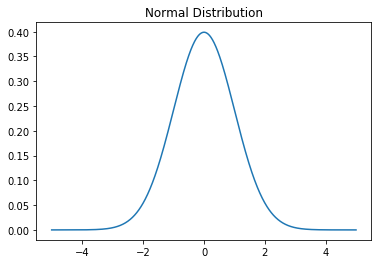

In [14]:
mean = 0
std = 1
var = np.square(std)
x = np.arange(-5,5,.01)
f = np.exp(-np.square(x-mean)/2*var)/(np.sqrt(2*np.pi*var))

plt.plot(x,f)
plt.title('Normal Distribution')
plt.show()

## Integrating the Normal PDF

Recall that for a continuous RV probability is computed using area under the curve of the PDF. For a standard normal RV, this function is even, i.e. it is symmetric about the y axis. It's useful to understand the area under the curve for certain symmetric intervals.

![68 95 99.7 Rule](68-95-997.png)

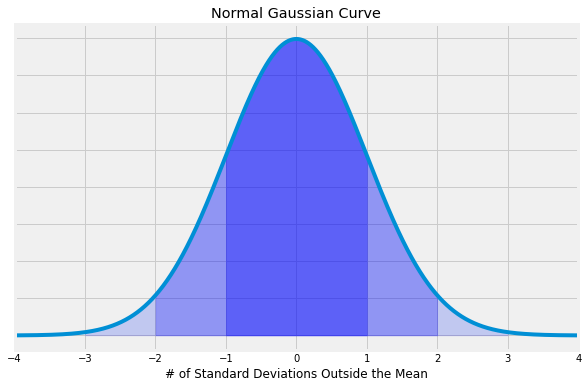

In [15]:
## Following https://pythonforundergradengineers.com/plotting-normal-curve-with-python.html
## First we import all the necessary libraries
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
from scipy.stats import norm
plt.style.use('fivethirtyeight')
%matplotlib inline

x1sd = np.arange(-1, 1, 0.001) # range of x in 1 standard deviation
x2sd = np.arange(-2, 2, 0.001) # range of x in 2 standard deviation
x3sd = np.arange(-3, 3, 0.001) # range of x in 3 standard deviation
x_all = np.arange(-4, 4, 0.001) # practically entire range of x

y_all = norm.pdf(x_all,0,1)
y1sd = norm.pdf(x1sd,0,1)
y2sd = norm.pdf(x2sd,0,1)
y3sd = norm.pdf(x3sd,0,1)

# build the plot
fig, ax = plt.subplots(figsize=(9,6))
ax.plot(x_all,y_all)

ax.fill_between(x_all,y_all,0, alpha=0.05)
ax.fill_between(x3sd,y3sd,0, alpha=0.15, color='b')
ax.fill_between(x2sd,y2sd,0, alpha=0.25, color='b')
ax.fill_between(x1sd,y1sd,0, alpha=0.35, color='b')
ax.set_xlim([-4,4])
ax.set_xlabel('# of Standard Deviations Outside the Mean')
ax.set_yticklabels([])
ax.set_title('Normal Gaussian Curve')
plt.savefig('68-95-997.png', dpi=72, bbox_inches='tight')
#plt.show()

## Normal Distributions: The 68-95-99.7 Rule

One of the properties of the normal distribution independednt of the mean and standard deviation is the **68-95-99.7 Rule** also called the **empirical rule** in Guttag. 

This says that for a random variable $X$ whose PDF is a unit normal, then

- $P(-1 \leq X \leq 1)$ is about 68%, i.e. the area under the curve between -1 and 1 is .68
- $P(-2 \leq X \leq 2)$ is about 95%, i.e. the area under the curve between -2 and 2 is .95
- $P(-3 \leq X \leq 3)$ is about 99.73%, i.e. the area under the curve between -3 and 3 is .9973